Repeat the same steps using a different classifier.

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
# print labels of every 50th images in digits dataset
print(digits.target[::50])

[0 2 4 0 1 4 7 7 4 4 8 6 2 4 2 6 4 5 4 3 1 1 9 8 7 1 3 3 2 5 1 5 2 5 5 3]


In [5]:
# print the digits dataset shape
digits.data.shape

(1797, 64)

In [6]:
# print the image at index 20
digits.images[20]


array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0., 16.,  1.,  0., 12.,  8.,  0.],
       [ 0.,  0., 15.,  9.,  0., 13.,  6.,  0.],
       [ 0.,  0.,  9., 14.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  2., 12., 13.,  4.,  0.,  0.]])

In [12]:
# print the label of image at index 20
digits.data[20]

array([ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
       16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
       16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
        0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
        9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.])

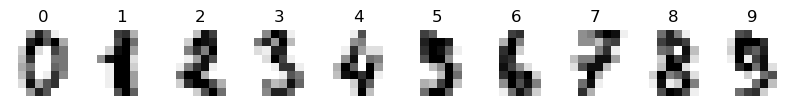

In [17]:
# use matplotlib.pyplot library to print 10 images
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for axes, image, target in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.set_title(target)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)


In [22]:
# print the shape of train dataset
print("Shape of X Train Dataset: ", X_train.shape)
print("Shape of Y Train Dataset: ", y_train.shape)

Shape of X Train Dataset:  (1437, 64)
Shape of Y Train Dataset:  (1437,)


In [23]:
# print the shape of test dataset
print("Shape of X Test Dataset: ", X_test.shape)
print("Shape of Y Test Dataset: ", y_test.shape)

Shape of X Test Dataset:  (360, 64)
Shape of Y Test Dataset:  (360,)


In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC()

In [26]:
svc.fit(X=X_train, y=y_train)

SVC()

In [27]:
predicted = svc.predict(X=X_test)

In [28]:
expected = y_test

In [29]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [30]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [31]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [36]:
wrong

[(5, 3), (9, 7), (7, 9), (7, 3), (8, 3)]

In [37]:
print(f'{svc.score(X_test, y_test):.2%}')

98.61%


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
# print the confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 36]], dtype=int64)

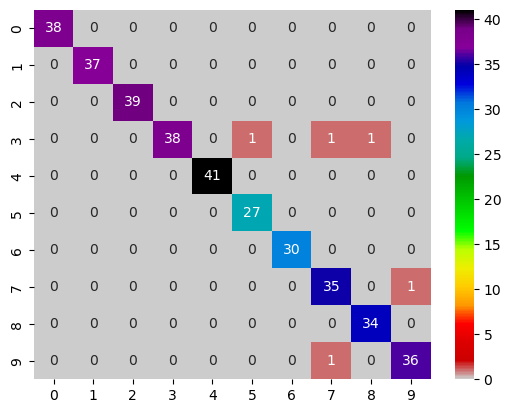

In [41]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [42]:
from sklearn.metrics import classification_report

In [43]:
# print the classification report and compare the results with the KNN classifier.

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      0.97      0.96        36
           8       0.97      1.00      0.99        34
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

